In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv(r'D://CodingNest//Kaggle//Projects//Titanic//train.csv')
df1 = pd.DataFrame(df)
df_train = df1[['Pclass','Age','SibSp','Parch','Sex']]

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Pclass    891 non-null int64
Age       714 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
Sex       891 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


In [4]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [5]:
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age, axis=1)

C:\Users\chirag\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
sex = pd.get_dummies(df_train['Sex'], drop_first=True)

In [7]:
df_train = pd.concat([df_train,sex],axis=1)
df_train.head()

,Pclass,Age,SibSp,Parch,Sex,male
0,3,22.0,1,0,male,1
1,1,38.0,1,0,female,0
2,3,26.0,0,0,female,0
3,1,35.0,1,0,female,0
4,3,35.0,0,0,male,1


In [8]:
import seaborn as sns
%matplotlib inline

In [9]:
df_train.drop('Sex',axis=1,inplace =True)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
X= df_train
X= StandardScaler().fit_transform(X.values)

In [12]:
y = df1['Survived']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42,shuffle=True)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors =4,p=2,metric ='minkowski')

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [18]:
y_train_pred = knn.predict(X_train)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [20]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.84      0.95      0.89       444
          1       0.90      0.71      0.79       268

avg / total       0.86      0.86      0.85       712



In [21]:
print(confusion_matrix(y_train, y_train_pred))

[[422  22]
 [ 79 189]]


In [22]:
print(accuracy_score(y_train, y_train_pred))

0.858146067416


In [23]:
#elbow method isused to set 'k' hyperparameter
error_rate = []
# Finding different error_rates on value of k (which is 1 to 20)
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    # Updating error_rate after identifying MEAN of observations which are not correctly identified
    error_rate.append(np.mean(y_pred_i != y_test))

In [24]:
import matplotlib.pyplot as plt

Text(0,0.5,'Error Rate')

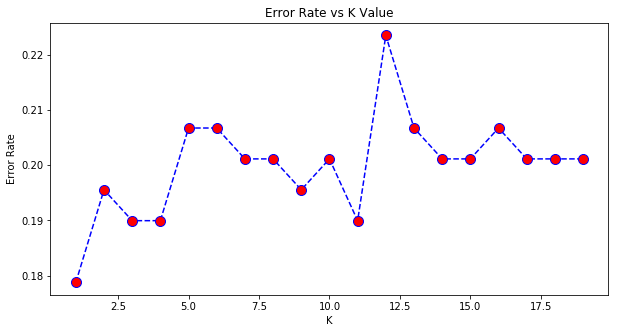

In [25]:
plt.figure(figsize=(10,5))
plt.plot(range(1,20),error_rate,color='blue',ls='--',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [26]:
y_test_pred = knn.predict(X_test)

In [27]:
print(confusion_matrix(y_test, y_test_pred))

[[91 14]
 [22 52]]


In [28]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)

In [29]:
print(confusion_matrix(y_test, y_test_pred))

[[93 12]
 [22 52]]


In [30]:
print(accuracy_score(y_train, y_train_pred))

0.858146067416


In [31]:
print(accuracy_score(y_test, y_test_pred))

0.810055865922


In [32]:
df_test = pd.read_csv(r'D://CodingNest//Kaggle//Projects//Titanic//test.csv')
XTEST = df_test[['Pclass','Age','SibSp','Parch','Sex']]

In [33]:
XTEST['Age'] = XTEST[['Age','Pclass']].apply(impute_age, axis=1)

C:\Users\chirag\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
sex1 = pd.get_dummies(XTEST['Sex'], drop_first=True)

In [35]:
XTEST = pd.concat([XTEST,sex1],axis=1)

In [36]:
XTEST.drop('Sex',axis=1,inplace =True)